In [9]:
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [10]:
# Load IMDB dataset
dataset = load_dataset("imdb")
train_texts = dataset["train"]["text"][:2000]
train_labels = dataset["train"]["label"][:2000]
test_texts = dataset["test"]["text"][:1000]
test_labels = dataset["test"]["label"][:1000]


In [11]:
# Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_texts)
train_seq = pad_sequences(tokenizer.texts_to_sequences(train_texts), maxlen=200)
test_seq = pad_sequences(tokenizer.texts_to_sequences(test_texts), maxlen=200)


In [12]:
# Model
model = Sequential([
    Embedding(10000, 16, input_length=200),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


D:\Workspace\rb\sample-tracker-api\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [13]:
# Train
history = model.fit(np.array(train_seq), np.array(train_labels), epochs=100, validation_data=(np.array(test_seq), np.array(test_labels)))


Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9931 - loss: 0.4113 - val_accuracy: 1.0000 - val_loss: 0.0434
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0325 - val_accuracy: 1.0000 - val_loss: 0.0087
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0083 - val_accuracy: 1.0000 - val_loss: 0.0036
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 8.3091e-04
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 9.8651e-04 - val_accuracy: 1.0000 - val_loss: 6.0188e-04
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 7.4000e-04 - val_accu

In [14]:
# Evaluate
preds = (model.predict(test_seq) > 0.5).astype("int32")
report = classification_report(test_labels, preds, output_dict=False)
print(report)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [15]:
# Save
model.save("sentiment_model_imdb.h5")


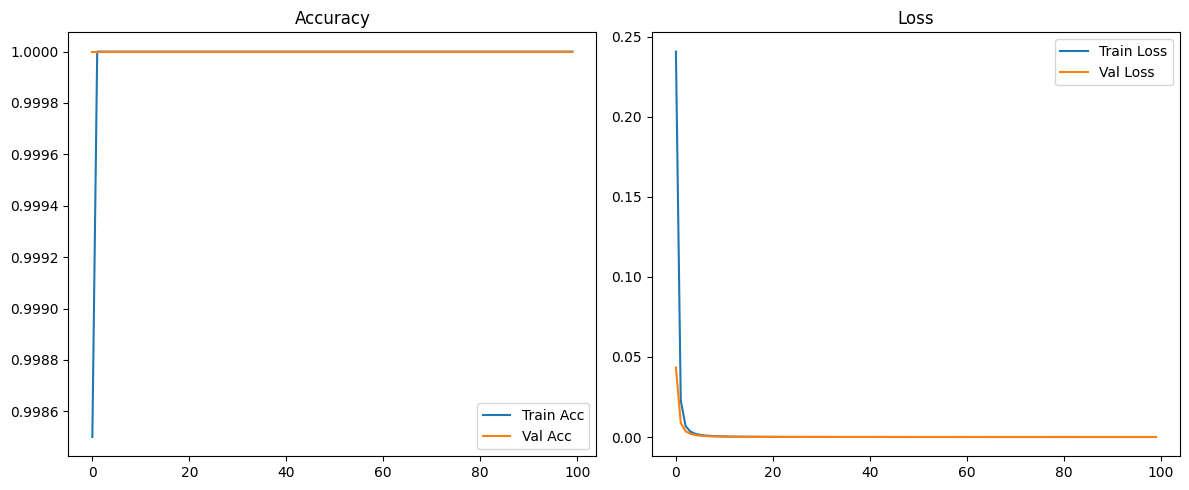

In [16]:
# Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.show()
